<a href="https://colab.research.google.com/github/Abdul-git25/digit-recognize/blob/main/Classify_2c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST Classification Framework

This notebook provides a complete framework for MNIST digit classification using a binary classifier.

## 1. Load MNIST Dataset

In [8]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [10]:
# Load MNIST dataset
print("Loading MNIST dataset...")
#from sklearn.datasets import fetch_openml

# Explicitly set data_home to avoid potential caching issues or warnings
# You can change this path if you have a preferred location for datasets
#mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
mnist = fetch_openml('mnist_784', as_frame=False, data_home='./mnist_data')

print("MNIST dataset loaded successfully.")

Loading MNIST dataset...
MNIST dataset loaded successfully.


In [11]:
X, y = mnist.data, mnist.target.astype(np.uint8)

print(f"Dataset shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Unique labels: {np.unique(y)}")

Dataset shape: (70000, 784)
Target shape: (70000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


## About MNIST Dataset

The MNIST (Modified National Institute of Standards and Technology) dataset is a classic benchmark in machine learning consisting of 70,000 handwritten digit images. Key characteristics:
- **Size**: 70,000 grayscale images
- **Dimensions**: 28x28 pixels (flattened to 784 features)
- **Classes**: Digits 0-9
- **Format**: Pixel values 0-255 (0=white, 255=black)
- **Usage**: Widely used for benchmarking classification algorithms

## 2. Visualize Random Digits

In [12]:
# Display a random digit
def plot_digit(image_data, label, ax=None):
    """Plot a single digit"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(3, 3))
    image = image_data.reshape(28, 28)
    ax.imshow(image, cmap='binary')
    ax.set_title(f"Label: {label}", fontsize=12)
    ax.axis('off')
    return ax

Displaying random digit at index 46006:


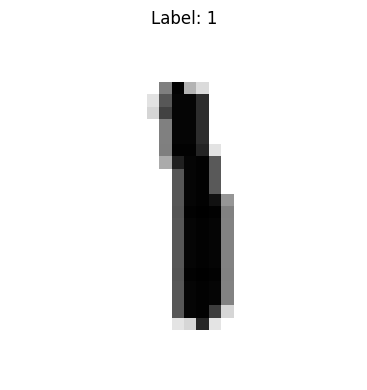

In [13]:
# Random digit
random_idx = np.random.randint(0, len(X))
print(f"Displaying random digit at index {random_idx}:")
fig, ax = plt.subplots(figsize=(4, 4))
plot_digit(X[random_idx], y[random_idx], ax)
plt.tight_layout()
plt.show()

First 25 digits from the dataset:


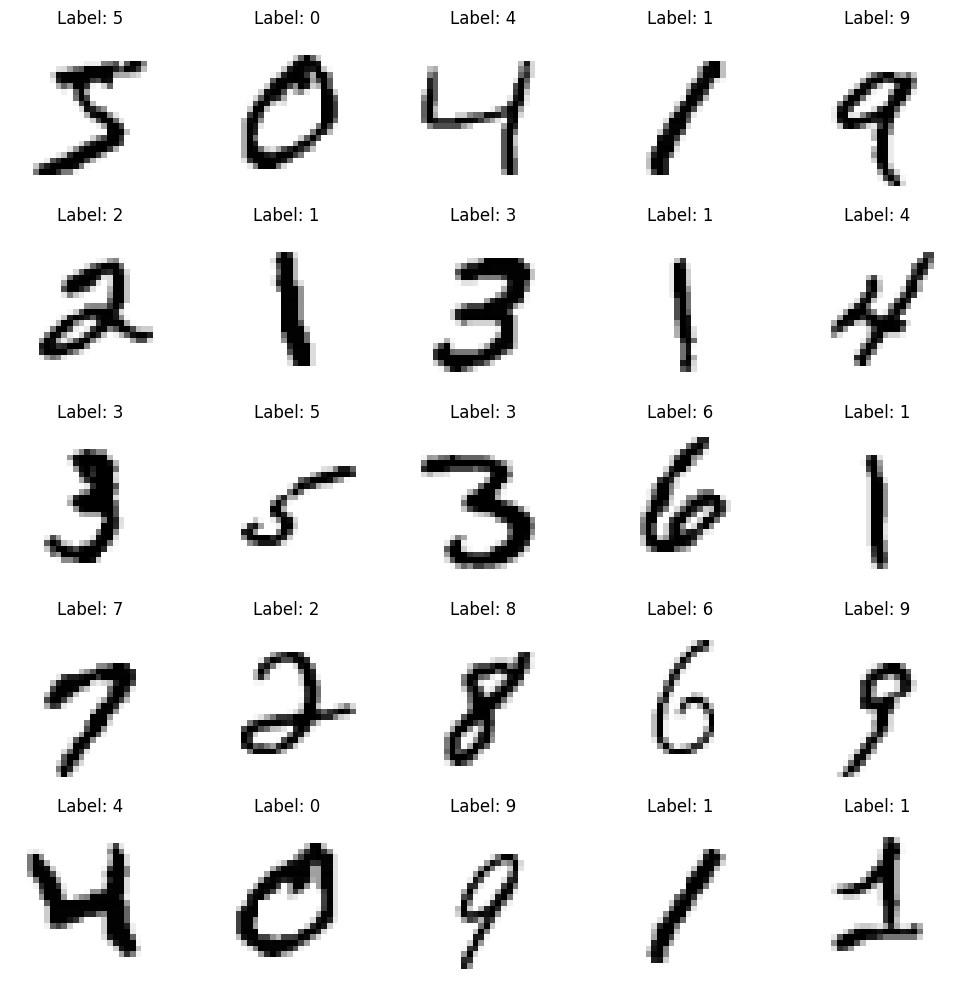

In [14]:
# Display first 25 digits
print("First 25 digits from the dataset:")
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    plot_digit(X[i], y[i], ax)
plt.tight_layout()
plt.show()

## 3. Split Dataset into Train, Cross-Validation, and Test Sets


In [15]:
# Split the dataset
print("Splitting dataset into train, cross-validation, and test sets...")

Splitting dataset into train, cross-validation, and test sets...


In [16]:
# First split: 60,000 for training, 10,000 for temp (will be split into CV and test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=5000, random_state=42, stratify=y
)

In [17]:
# Second split: Split temp into cross-validation and remaining test
X_train, X_cv, y_train, y_cv = train_test_split(
    X_temp, y_temp, test_size=5000, random_state=42, stratify=y_temp
)

In [18]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Cross-validation set: {X_cv.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 60000 samples
Cross-validation set: 5000 samples
Test set: 5000 samples


In [19]:
# Verify class distribution
print("\nClass distribution in each set:")
for set_name, y_set in [("Train", y_train), ("CV", y_cv), ("Test", y_test)]:
    unique, counts = np.unique(y_set, return_counts=True)
    print(f"{set_name}: {dict(zip(unique, counts))}")


Class distribution in each set:
Train: {np.uint8(0): np.int64(5917), np.uint8(1): np.int64(6751), np.uint8(2): np.int64(5992), np.uint8(3): np.int64(6121), np.uint8(4): np.int64(5850), np.uint8(5): np.int64(5411), np.uint8(6): np.int64(5894), np.uint8(7): np.int64(6251), np.uint8(8): np.int64(5849), np.uint8(9): np.int64(5964)}
CV: {np.uint8(0): np.int64(493), np.uint8(1): np.int64(563), np.uint8(2): np.int64(499), np.uint8(3): np.int64(510), np.uint8(4): np.int64(487), np.uint8(5): np.int64(451), np.uint8(6): np.int64(491), np.uint8(7): np.int64(521), np.uint8(8): np.int64(488), np.uint8(9): np.int64(497)}
Test: {np.uint8(0): np.int64(493), np.uint8(1): np.int64(563), np.uint8(2): np.int64(499), np.uint8(3): np.int64(510), np.uint8(4): np.int64(487), np.uint8(5): np.int64(451), np.uint8(6): np.int64(491), np.uint8(7): np.int64(521), np.uint8(8): np.int64(488), np.uint8(9): np.int64(497)}


## 4. Train a Binary Classifier

In [20]:
# For binary classification, let's classify digit 5 vs all other digits
TARGET_DIGIT = 5

In [21]:
# Create binary labels: 1 for target digit, 0 for others
y_train_binary = (y_train == TARGET_DIGIT).astype(np.int8)
y_cv_binary = (y_cv == TARGET_DIGIT).astype(np.int8)
y_test_binary = (y_test == TARGET_DIGIT).astype(np.int8)

In [22]:
print(f"Binary classification: {TARGET_DIGIT} vs all other digits")
print(f"Training set - Class distribution: {np.unique(y_train_binary, return_counts=True)}")
print(f"CV set - Class distribution: {np.unique(y_cv_binary, return_counts=True)}")

Binary classification: 5 vs all other digits
Training set - Class distribution: (array([0, 1], dtype=int8), array([54589,  5411]))
CV set - Class distribution: (array([0, 1], dtype=int8), array([4549,  451]))


In [23]:
# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_cv_scaled = scaler.transform(X_cv.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

In [24]:
# Train a Stochastic Gradient Descent classifier
print("Training binary classifier...")
sgd_clf = SGDClassifier(
    random_state=42,
    max_iter=1000,
    tol=1e-3,
    loss='log_loss'  # logistic regression
)

sgd_clf.fit(X_train_scaled, y_train_binary)

print("Training completed!")

Training binary classifier...
Training completed!


## 5. Cross-Validate the Classifier

In [25]:
# Make predictions on cross-validation set
print("Cross-validating the classifier...")
y_cv_pred = sgd_clf.predict(X_cv_scaled)
y_cv_pred_proba = sgd_clf.predict_proba(X_cv_scaled)

Cross-validating the classifier...


In [26]:
# Calculate cross-validation accuracy
cv_accuracy = accuracy_score(y_cv_binary, y_cv_pred)
print(f"Cross-validation Accuracy: {cv_accuracy:.4f}")

Cross-validation Accuracy: 0.9674


In [27]:
# Detailed classification report
print("\nCross-validation Classification Report:")
print(classification_report(y_cv_binary, y_cv_pred,
                          target_names=[f'Not {TARGET_DIGIT}', str(TARGET_DIGIT)]))


Cross-validation Classification Report:
              precision    recall  f1-score   support

       Not 5       0.98      0.99      0.98      4549
           5       0.87      0.76      0.81       451

    accuracy                           0.97      5000
   macro avg       0.92      0.87      0.89      5000
weighted avg       0.97      0.97      0.97      5000



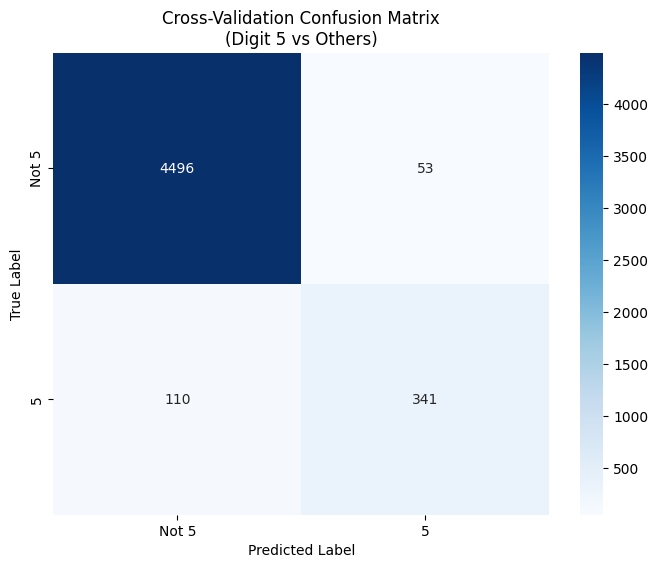

In [28]:
# Confusion matrix for cross-validation
cv_cm = confusion_matrix(y_cv_binary, y_cv_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cv_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Not {TARGET_DIGIT}', str(TARGET_DIGIT)],
            yticklabels=[f'Not {TARGET_DIGIT}', str(TARGET_DIGIT)])
plt.title(f'Cross-Validation Confusion Matrix\n(Digit {TARGET_DIGIT} vs Others)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## 6. Test the Classifier

In [29]:
# Make predictions on test set
print("Testing the classifier...")
y_test_pred = sgd_clf.predict(X_test_scaled)
y_test_pred_proba = sgd_clf.predict_proba(X_test_scaled)

Testing the classifier...


In [30]:
# Calculate test accuracy
test_accuracy = accuracy_score(y_test_binary, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9740


In [31]:
# Detailed classification report
print("\nTest Classification Report:")
print(classification_report(y_test_binary, y_test_pred,
                          target_names=[f'Not {TARGET_DIGIT}', str(TARGET_DIGIT)]))


Test Classification Report:
              precision    recall  f1-score   support

       Not 5       0.98      0.99      0.99      4549
           5       0.90      0.80      0.85       451

    accuracy                           0.97      5000
   macro avg       0.94      0.90      0.92      5000
weighted avg       0.97      0.97      0.97      5000



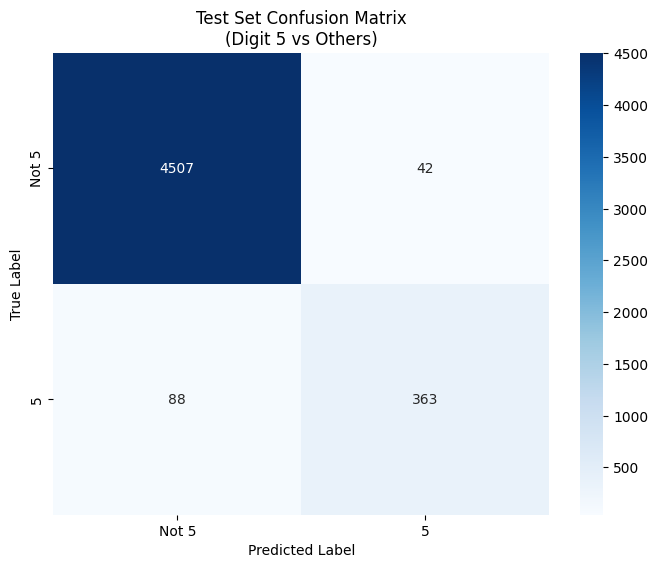

In [32]:
# Confusion matrix for test set
test_cm = confusion_matrix(y_test_binary, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Not {TARGET_DIGIT}', str(TARGET_DIGIT)],
            yticklabels=[f'Not {TARGET_DIGIT}', str(TARGET_DIGIT)])
plt.title(f'Test Set Confusion Matrix\n(Digit {TARGET_DIGIT} vs Others)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## 7. Performance Measurement and Analysis

In [33]:
# Comprehensive performance analysis
print("="*50)
print("COMPREHENSIVE PERFORMANCE ANALYSIS")
print("="*50)

COMPREHENSIVE PERFORMANCE ANALYSIS


In [34]:
# Accuracy scores
print(f"\nAccuracy Scores:")
print(f"Training set (estimated): {sgd_clf.score(X_train_scaled, y_train_binary):.4f}")
print(f"Cross-validation set: {cv_accuracy:.4f}")
print(f"Test set: {test_accuracy:.4f}")


Accuracy Scores:
Training set (estimated): 0.9728
Cross-validation set: 0.9674
Test set: 0.9740


In [35]:
# Precision, Recall, F1-score analysis
from sklearn.metrics import precision_score, recall_score, f1_score

test_precision = precision_score(y_test_binary, y_test_pred)
test_recall = recall_score(y_test_binary, y_test_pred)
test_f1 = f1_score(y_test_binary, y_test_pred)

print(f"\nDetailed Test Set Metrics for Digit {TARGET_DIGIT}:")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")


Detailed Test Set Metrics for Digit 5:
Precision: 0.8963
Recall: 0.8049
F1-Score: 0.8481


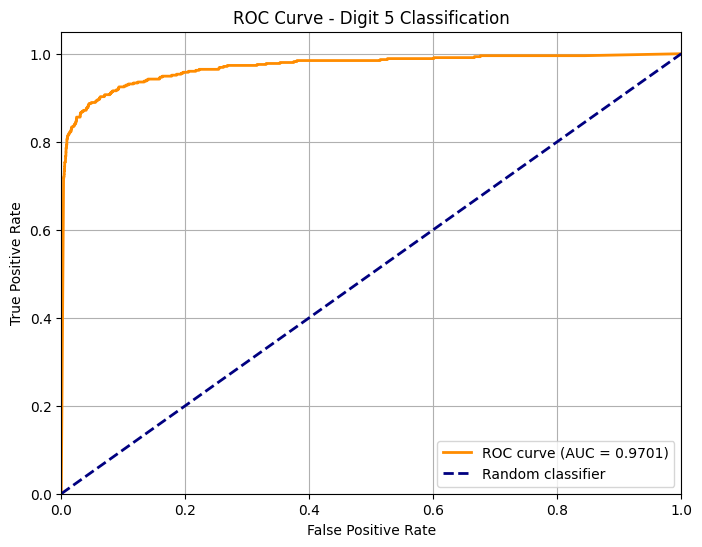

In [36]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_binary, y_test_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Digit {TARGET_DIGIT} Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [37]:
# Display some test examples with predictions
def display_predictions(X, y_true, y_pred, y_proba, indices):
    """Display predictions for specific indices"""
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, idx in enumerate(indices):
        ax = axes[i // 5, i % 5]
        plot_digit(X[idx], f"True: {y_true[idx]}\nPred: {y_pred[idx]}\nProb: {y_proba[idx, 1]:.3f}", ax)
        # Color code based on correctness
        color = 'green' if y_true[idx] == y_pred[idx] else 'red'
        for spine in ax.spines.values():
            spine.set_edgecolor(color)
            spine.set_linewidth(3)
    plt.tight_layout()
    plt.show()

Correct predictions examples:


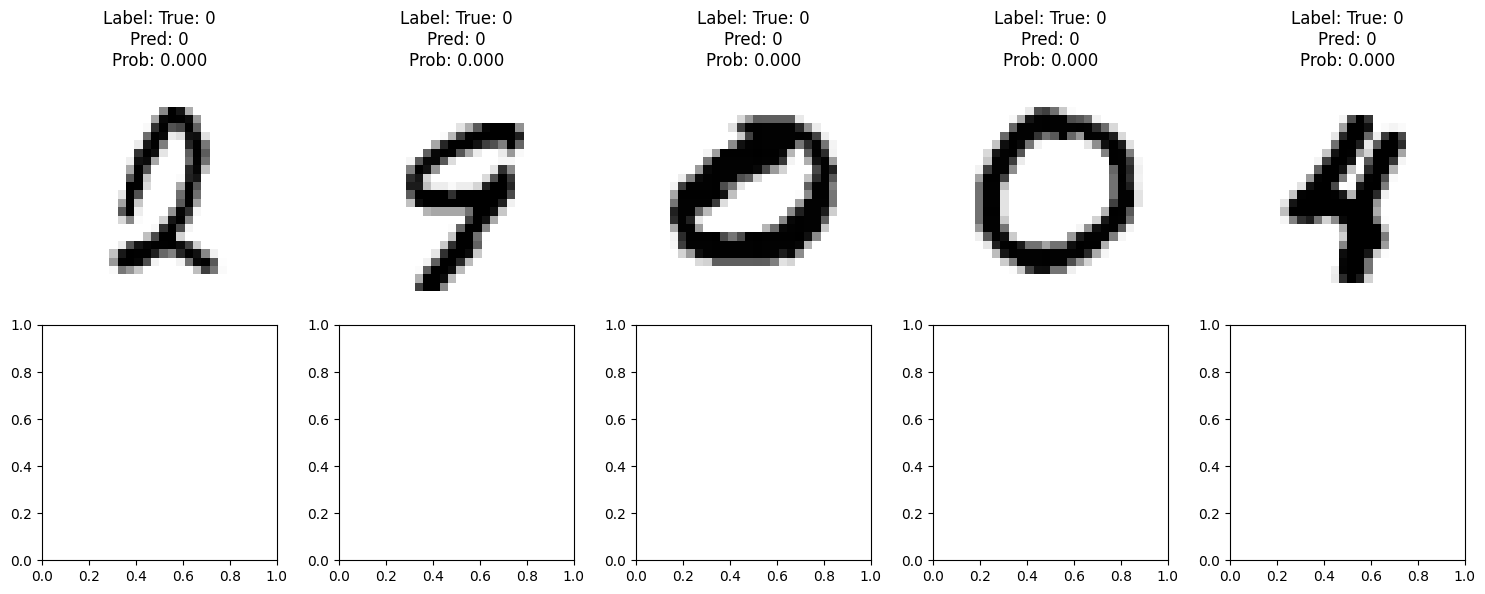

Incorrect predictions examples:


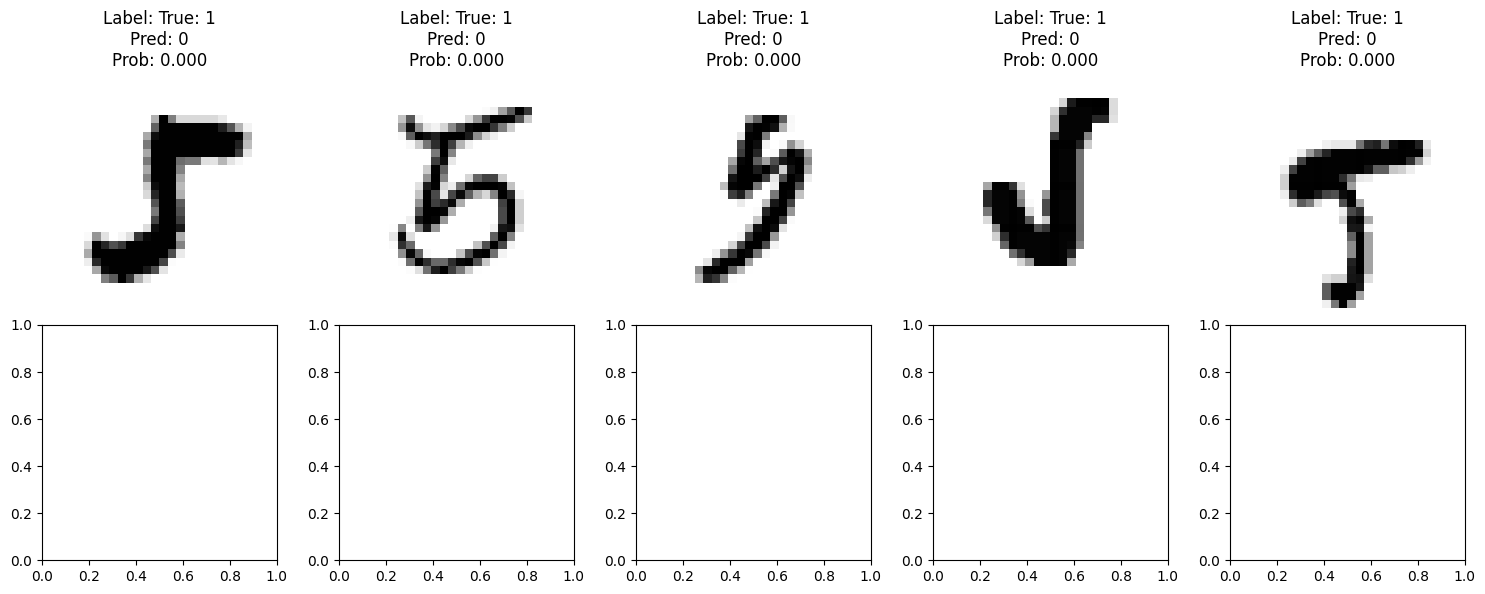

In [38]:
# Find some interesting examples
correct_indices = []
incorrect_indices = []

for i in range(len(y_test_binary)):
    if y_test_binary[i] == y_test_pred[i] and len(correct_indices) < 5:
        correct_indices.append(i)
    elif y_test_binary[i] != y_test_pred[i] and len(incorrect_indices) < 5:
        incorrect_indices.append(i)
    if len(correct_indices) == 5 and len(incorrect_indices) == 5:
        break

print("Correct predictions examples:")
display_predictions(X_test, y_test_binary, y_test_pred, y_test_pred_proba, correct_indices)

print("Incorrect predictions examples:")
display_predictions(X_test, y_test_binary, y_test_pred, y_test_pred_proba, incorrect_indices)

In [39]:
# Final summary
print("="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Binary Classification Task: Digit {TARGET_DIGIT} vs All Others")
print(f"Dataset Size: {X.shape[0]} total samples")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Cross-validation Samples: {X_cv.shape[0]}")
print(f"Test Samples: {X_test.shape[0]}")
print(f"\nFinal Test Performance:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print(f"AUC: {roc_auc:.4f}")

FINAL PERFORMANCE SUMMARY
Binary Classification Task: Digit 5 vs All Others
Dataset Size: 70000 total samples
Training Samples: 60000
Cross-validation Samples: 5000
Test Samples: 5000

Final Test Performance:
Accuracy: 0.9740
Precision: 0.8963
Recall: 0.8049
F1-Score: 0.8481
AUC: 0.9701


In [40]:
# Model coefficients analysis (feature importance)
if hasattr(sgd_clf, 'coef_'):
    print(f"\nModel has {sgd_clf.coef_.shape[1]} features")
    print(f"Average absolute coefficient: {np.mean(np.abs(sgd_clf.coef_)):.4f}")


Model has 784 features
Average absolute coefficient: 2.8980
